<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/Simple_ANN_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

This project is the simple version of classification problem by using simple Artificial Neural Network (ANN). At the end of the project, the classification process will be for 10 class. 

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist


In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

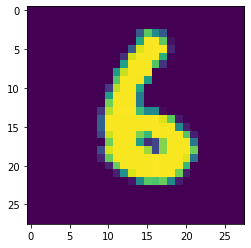

In [21]:
plt.imshow(np.array(X_train[36]))
plt.show()

In [22]:
a = []
b = []

In [23]:
for j in range(len(y_train)):
  a.append(to_categorical(y_train[j],num_classes=10))
y_train = np.array(a)

for i in range(len(y_test)):
  b.append(to_categorical(y_test[i],num_classes=10))
y_test = np.array(b)

In [24]:
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(x=X_train,y=y_train,batch_size=80,epochs=8,validation_data=(X_test,y_test))

Epoch 1/8
750/750 [==============================] - 4s 4ms/step - loss: 1.4024 - accuracy: 0.6579 - val_loss: 0.7812 - val_accuracy: 0.8223
Epoch 2/8
750/750 [==============================] - 2s 3ms/step - loss: 0.6270 - accuracy: 0.8500 - val_loss: 0.5046 - val_accuracy: 0.8670
Epoch 3/8
750/750 [==============================] - 2s 3ms/step - loss: 0.4709 - accuracy: 0.8730 - val_loss: 0.4104 - val_accuracy: 0.8883
Epoch 4/8
750/750 [==============================] - 3s 4ms/step - loss: 0.4165 - accuracy: 0.8831 - val_loss: 0.3857 - val_accuracy: 0.8884
Epoch 5/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3772 - accuracy: 0.8927 - val_loss: 0.3613 - val_accuracy: 0.8947
Epoch 6/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3713 - accuracy: 0.8924 - val_loss: 0.3496 - val_accuracy: 0.9009
Epoch 7/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3415 - accuracy: 0.9014 - val_loss: 0.3180 - val_accuracy: 0.9078
Epoch 8/8
750

In [29]:
predictions = model.predict(X_test)
print(predictions)

[[0.40391427 0.4291336  0.6351874  ... 0.99924994 0.31190285 0.89429   ]
 [0.89136165 0.02467948 0.9886956  ... 0.31010583 0.64893174 0.05755085]
 [0.0786573  0.9992703  0.00434873 ... 0.68210334 0.62069845 0.8700739 ]
 ...
 [0.00242397 0.12056708 0.11710301 ... 0.21481979 0.690192   0.96917117]
 [0.24179587 0.4119783  0.0521625  ... 0.02186385 0.92943597 0.01284656]
 [0.7199696  0.00297439 0.7780814  ... 0.05580917 0.5682571  0.16371909]]


In [30]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


In [31]:
predictions[52]

5

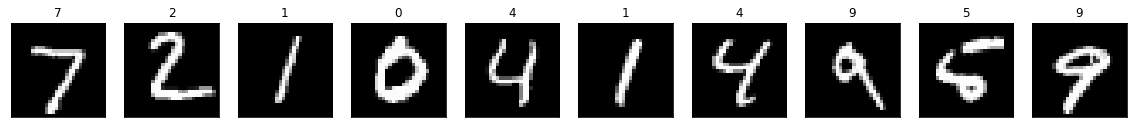

In [32]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()